In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all

<bound method Query.all of <sqlalchemy.orm.query.Query object at 0x0000012D3E639188>>

In [5]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_Temp_df = pd.DataFrame(results, columns=['date','temperature'])
June_Temp_df.set_index(June_Temp_df['date'], inplace=True)

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_Temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all

<bound method Query.all of <sqlalchemy.orm.query.Query object at 0x0000012D3E7F9188>>

In [10]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_Temp_df = pd.DataFrame(results, columns=['date','temperature'])
Dec_Temp_df.set_index(Dec_Temp_df['date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
Dec_Temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date'>

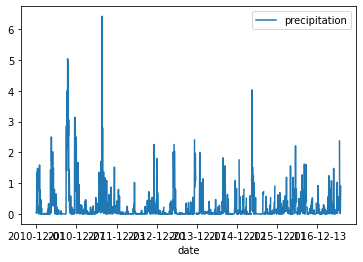

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores for DECEMBER
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Dec_Precip_df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
Dec_Precip_df.set_index(Dec_Precip_df['date'], inplace=True)
Dec_Precip_df = Dec_Precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
Dec_Precip_df.plot()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Dec_Precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:xlabel='date'>

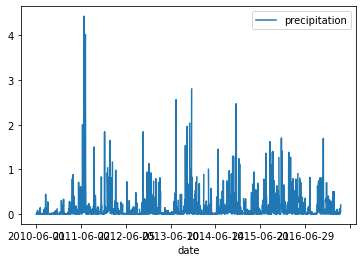

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores for DECEMBER
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
June_Precip_df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
June_Precip_df.set_index(June_Precip_df['date'], inplace=True)
June_Precip_df = June_Precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
June_Precip_df.plot()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
June_Precip_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000
